# MSc Project ( 1.1 )

- Surya L Ramesh (0206793)

##   Iteration 1 - Initial EDA for the SNLI Dataset 

In [6]:
''' Loads, Explores and Cleans the SNLI Datset '''

' Loads, Explores and Cleans the SNLI Datset '

In [7]:


#Load the libraries needed

import pandas as pd
import spacy
import os
import numpy as np
import fnmatch 
import matplotlib.pyplot as plt 
import re

from pathlib import Path
from termcolor import colored
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils




## Functions

In [8]:
''' function to load data and tidy it - pass the dataframe, kepp only wanted columns, remove'-' rows, from gold_label, 
remove rows with na , rename columns'''

def data_load_tidy(dataframe):
    dataframe = dataframe[['sentence1','sentence2','gold_label']]
    #print(dataframe.head(3))
    dataframe = dataframe[dataframe['gold_label'] != '-' ]
    dataframe1= dataframe.dropna(axis=0, inplace=False) # fixed additional nan in test and val with inplace=False 
    data_tidy = dataframe1.rename(columns= {'sentence1':'premise', 'sentence2':'hypothesis', 'gold_label':'target'}, inplace=False)
    #data_tidy = re.sub("[^A-Za-z']+", ' ', str(data_tidy)).lower().replace("'", '')
    print(colored('\n data is tidied ....','green')) 
    return data_tidy

    

In [9]:
''' Function to clean the strings'''

def clean_string(txt):
    return re.sub("[^A-Za-z']+", ' ', str(txt)).lower().replace("'", '') #.replace(".","")

## Step 1: Load and Tidy the Data


Data is already split into train , test and dev(validate)  in the dataset

In [10]:
#Use Relative path 
path = 'SNLI_Data_Csv'
dirList = os.listdir(path)
for dir in dirList:
  sub_path = os.path.join(path,dir) 
  #print(sub_path)
  if fnmatch.fnmatch(sub_path,'*_train*'):
    print(colored('\n In Filename and path: %s' % (sub_path),'blue')) 
    df_train = pd.read_csv(sub_path,nrows =350000)  # changed to 10K for experimentation 
    train_tidy = data_load_tidy(df_train)
    
  if fnmatch.fnmatch(sub_path,'*_test*'):  
    print(colored('\n In Filename and path: %s' % (sub_path),'blue')) 
    df_test = pd.read_csv(sub_path,nrows =100000) # changed to 10K for experimentation 
    test_tidy =  data_load_tidy(df_test)
    
  if fnmatch.fnmatch(sub_path,'*_dev*'):  
    print(colored('\n In Filename and path: %s' % (sub_path),'blue')) 
    df_val = pd.read_csv(sub_path,nrows =100000)  # changed to 10K for experimentation 
    val_tidy = data_load_tidy(df_val)




FileNotFoundError: [WinError 3] The system cannot find the path specified: 'SNLI_Data_Csv'

## Step 2: EDA (Exploratory Data Analysis)

### Check the Shape of each dataframe

In [15]:

shapetrain = train_tidy.shape
print('\nTrain DataFrame Shape :', shapetrain)

NameError: name 'train_tidy' is not defined

In [16]:

shapetest = test_tidy.shape
print('\nTest DataFrame Shape :', shapetest)

NameError: name 'test_tidy' is not defined

In [17]:
#df_val
shapeval = val_tidy.shape
print('\nValidation DataFrame Shape :', shapeval)

NameError: name 'val_tidy' is not defined

In [18]:
train_tidy.premise.sample(10)

NameError: name 'train_tidy' is not defined

text contains "" and ',' and ''' '!' and unwanted spaces

### Check the first two lines of each dataframe

In [19]:
train_tidy.head(2)

NameError: name 'train_tidy' is not defined

In [20]:
test_tidy.head(2)

NameError: name 'test_tidy' is not defined

In [21]:
val_tidy.head()

NameError: name 'val_tidy' is not defined

**In train**: No of rows dropped to 549367 from 550152 rows after removing unassigned gold label,number of rows dropped to 549361 now after removing na,6 rows removed

- total rows removed = 791

**In test and val**:10000 down to 9824 

- total rows removed = 176


In [22]:
# check datatypes of the dataframes
train_tidy.dtypes


NameError: name 'train_tidy' is not defined

In [23]:
test_tidy.dtypes

NameError: name 'test_tidy' is not defined

In [24]:
val_tidy.dtypes

NameError: name 'val_tidy' is not defined

In [25]:
# convert target to type category 
# set random seed , The fraction of rows and columns to be selected can be specified in the parameter frac. frac=1 means 100%.
#axis = 0 , rows are sampled.

train_tidy['target'] = train_tidy['target'].astype('category')
train_tidy = train_tidy.sample(axis=0, frac=1,random_state=111).reset_index(drop=True)
test_tidy['target'] = test_tidy['target'].astype('category')
test_tidy = test_tidy.sample(axis=0, frac=1,random_state=111).reset_index(drop=True)
val_tidy['target'] = val_tidy['target'].astype('category')
val_tidy = val_tidy.sample(axis=0, frac=1,random_state=111).reset_index(drop=True)


NameError: name 'train_tidy' is not defined

### Check if Data is shuffled

In [26]:
train_tidy.dtypes
train_tidy.head(10)

NameError: name 'train_tidy' is not defined

In [27]:
test_tidy.dtypes
test_tidy.head(10)

NameError: name 'test_tidy' is not defined

In [28]:
val_tidy.dtypes
val_tidy.head(10)

NameError: name 'val_tidy' is not defined

### Check the categories 

In [29]:
print('\nCategories to predict in Train Set : ',train_tidy['target'].unique())
print('\nCategories to predict:in Test Set ',test_tidy['target'].unique())
print('\nCategories to predict:in Validation Set ',val_tidy['target'].unique())


NameError: name 'train_tidy' is not defined

### Check for an nan 

In [30]:
train_tidy.isnull().sum().sum()
test_tidy.isnull().sum().sum()
val_tidy.isnull().sum().sum()
#test_tidy['target'].isnull().sum()

NameError: name 'train_tidy' is not defined

### for train data - check for class count in each target label

In [31]:
train_tidy['target'].value_counts()


NameError: name 'train_tidy' is not defined

In [32]:
# view the count in each class

plt.figure(figsize =((15,5)))

train_tidy['target'].value_counts().sort_index().plot.barh(title = "Count of each category in the Train Set ",color=['olive','rosybrown', 'darkturquoise'])


NameError: name 'train_tidy' is not defined

<Figure size 1080x360 with 0 Axes>

It can be seen that the data is almost balanced in the training set 

In [33]:
plt.figure(figsize =((15,5)))
test_tidy['target'].value_counts().sort_index().plot.barh(title = "Count of each category in the Test Set",color=['olive','rosybrown', 'darkturquoise'])

NameError: name 'test_tidy' is not defined

<Figure size 1080x360 with 0 Axes>

It can be seen that the data is almost balanced in the test set, with stlighly more examples in the entailment class

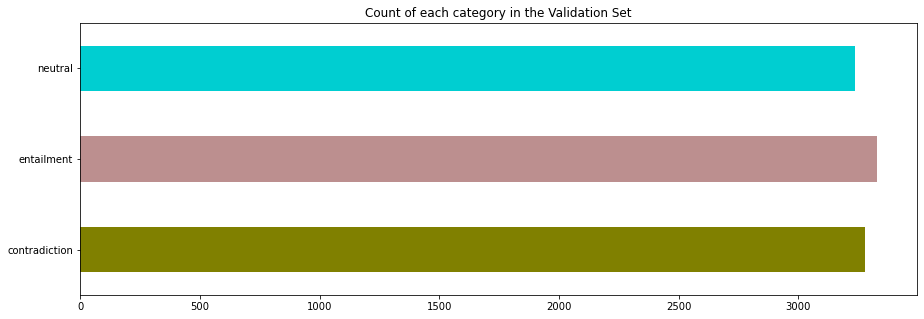

In [27]:
plt.figure(figsize =((15,5)))
val_tidy['target'].value_counts().sort_index().plot.barh(title = "Count of each category in the Validation Set",color=['olive','rosybrown', 'darkturquoise'])

In [28]:
val_tidy['target'].describe()

count           9842
unique             3
top       entailment
freq            3329
Name: target, dtype: object

It can be seen that the data is almost balanced in the validation  set, with stlighly more examples in the entailment class

No balancing techniques needed 

## Clean the strings (premise, hypothesis)


In [29]:
train_tidy['premise_clean'] = train_tidy.premise.apply(clean_string)
train_tidy['hypothesis_clean'] = train_tidy.hypothesis.apply(clean_string)
test_tidy['premise_clean'] = test_tidy.premise.apply(clean_string)
test_tidy['hypothesis_clean'] = test_tidy.hypothesis.apply(clean_string)


In [30]:
val_tidy['premise_clean'] = val_tidy.premise.apply(clean_string)
val_tidy['hypothesis_clean'] = val_tidy.hypothesis.apply(clean_string)


In [31]:
train_tidy.head()

,premise,hypothesis,target,premise_clean,hypothesis_clean
0,A man on a motorcycle with a cigarette,The man is smoking while driving.,neutral,a man on a motorcycle with a cigarette,the man is smoking while driving
1,"Man in green jacket with a bouquet of flowers,...",a man is riding a skateboarx,contradiction,man in green jacket with a bouquet of flowers ...,a man is riding a skateboarx
2,"Two children, an older boy and a younger girl,...",They run down to the beach in their swimming t...,contradiction,two children an older boy and a younger girl a...,they run down to the beach in their swimming t...
3,A man is in a tree using an axe to shop at a b...,dog chases two cars,contradiction,a man is in a tree using an axe to shop at a b...,dog chases two cars
4,A male is working in a bakery shop is taking o...,A man is working in a butcher shop.,contradiction,a male is working in a bakery shop is taking o...,a man is working in a butcher shop


In [32]:
test_tidy.head()

,premise,hypothesis,target,premise_clean,hypothesis_clean
0,An Indian woman stands in an outdoor marketplace.,An American shops at the supermarket.,contradiction,an indian woman stands in an outdoor marketplace,an american shops at the supermarket
1,Young people are standing around a drum at a p...,A drum is in a museum.,contradiction,young people are standing around a drum at a p...,a drum is in a museum
2,Two men in black jackets behind a white handrail.,The two me are wearing black jackets,entailment,two men in black jackets behind a white handrail,the two me are wearing black jackets
3,A person in a large pink triangle-shaped costu...,The person is marching in a parade.,neutral,a person in a large pink triangle shaped costu...,the person is marching in a parade
4,A teen is standing in a field and is in the up...,The teenager has just made a hole-in-one while...,neutral,a teen is standing in a field and is in the up...,the teenager has just made a hole in one while...


In [33]:
val_tidy['hypothesis_clean'][0]  # choose one to check 

'men are sleeping '

## Encode Labels

In [34]:


le = LabelEncoder()
train_tidy['target'] = le.fit_transform(train_tidy.target)
val_tidy['target'] = le.fit_transform(val_tidy.target)
test_tidy['target'] = le.fit_transform(test_tidy.target)
# no need to transform the test catergory as it will be dropped????or needs to be not encoded???


In [35]:
train_tidy.head()

,premise,hypothesis,target,premise_clean,hypothesis_clean
0,A man on a motorcycle with a cigarette,The man is smoking while driving.,2,a man on a motorcycle with a cigarette,the man is smoking while driving
1,"Man in green jacket with a bouquet of flowers,...",a man is riding a skateboarx,0,man in green jacket with a bouquet of flowers ...,a man is riding a skateboarx
2,"Two children, an older boy and a younger girl,...",They run down to the beach in their swimming t...,0,two children an older boy and a younger girl a...,they run down to the beach in their swimming t...
3,A man is in a tree using an axe to shop at a b...,dog chases two cars,0,a man is in a tree using an axe to shop at a b...,dog chases two cars
4,A male is working in a bakery shop is taking o...,A man is working in a butcher shop.,0,a male is working in a bakery shop is taking o...,a man is working in a butcher shop


In [36]:
train_tidy['hypothesis_clean'][0]

'the man is smoking while driving '

In [37]:
val_tidy.head()

,premise,hypothesis,target,premise_clean,hypothesis_clean
0,Two men in animal print pajama bottoms sleep o...,Men are sleeping.,1,two men in animal print pajama bottoms sleep o...,men are sleeping
1,A man is putting on a yellow necktie while ano...,a man puts on a tie,1,a man is putting on a yellow necktie while ano...,a man puts on a tie
2,Female sitting in a chair in front of a hazy f...,A woman is waiting for someone.,2,female sitting in a chair in front of a hazy f...,a woman is waiting for someone
3,"A blond guitarist, dressed all in black, perfo...",A person is playing the guitar.,1,a blond guitarist dressed all in black performs,a person is playing the guitar
4,A young boy reaches for and touches the propel...,A young boy and his friend admire the vintage ...,2,a young boy reaches for and touches the propel...,a young boy and his friend admire the vintage ...


In [38]:
#train_tidy['target'].dtypes() #can't do dtypes anymore
train_tidy.target.head()  #my output is of type int32, the example is of type int64

0    2
1    0
2    0
3    0
4    0
Name: target, dtype: int32